# Homework #1 - Titanic model
Afet Ibadova 453818

**Main task:** Please reproduce our exercises in terms of binary classification on the recommended Titanic set (link: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv). Please use the **survived** variable as target. The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their passenger-class, their sex etc.


**Some story behind dataset:** *On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.*


 *If you feel like using another dataset that is dedicated to binary or multiclass classification, feel free to use it.*


**Steps**
1. Load your data and prepare train-test split - check if your data is well balanced in terms of the target variable (if not try to use the stratify strategy in `train_test_split` function - see documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

2. Create decent EDA/SEDA on training dataset - remember that you can use your statistical data analysis skills. Now you have many more categorical variables available - you can use e.g. Fisher/Chi2 tests (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html), ANOVA analysis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html), box-plots with some grouping (https://plotly.com/python/box-plots/) and many many more.
3. Create some cool features - due to the larger number of categorical variables, you can use something much sexier in addition to one-hot-encoding: http://contrib.scikit-learn.org/category_encoders/. Familiarize yourself with the methods available in this package and if you find something for yourself, use it (remember that you fit the method on the train set, and on the test set you only perform transformations on the already fitted object). Everything in this step depends on your imagination and the number of methods you know :)
4. Create your first logistic regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as we did with linear regression. Note that in the documentation for default logistic regression L2 regularization is turned on, turn it off first (penalty = None). In addition, in this step you must choose the evaluation functions for you (https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values). Based on the lecture and the available documentation, select the functions that will be appropriate for your problem (e.g. check if you are dealing with an unbalanced problem and decide what is more important to you, e.g. Precision or Recall optimization). Try to plot two curves that we discussed during our lecture: ROC (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) and PR (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_predictions). Remember to experiment with different logit models because of the explanatory variables used.
5. Use cross-validation of your choice (if your sample is unbalanced, use cross-validation with stratified, e.g. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).
6. Check whether regularization will be helpful in your problem - use three models of regularized logistic regression (ridge, lasso and elastic net). You can use the LogisticRegression object for this (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) - note that you have three hyperparameters at your disposal: a) penalty - Specify the norm of the penalty; b) C - **Inverse** of regularization strength; c) l1_ratio - this remark only makes sense if you are using elastic net. Try playing with these hyperparameters.
7. Use your chosen hyperparameter tuning method for regularized logistic regression. Check on the out-of-sample test set whether your results have improved.


# Import libraries

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_val_predict

import warnings
warnings.filterwarnings("ignore")

# Task 1:

Load your data and prepare train-test split - check if your data is well balanced in terms of the target variable (if not try to use the stratify strategy in train_test_split function - see documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

## 1.1. Load Dataset


In [312]:
# Load the dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)
df.head(10)

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   
5         0       3                                    Mr. James Moran   
6         0       1                             Mr. Timothy J McCarthy   
7         0       3                      Master. Gosta Leonard Palsson   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
5    male  27.0                        0                        0   8.4583  
6    male  54.0                        0                        0  51.8625  
7    male   2.0                        3                        1  21.0750  
8  female  27.0                        0                        2  11.1333  
9  female  14.0                        1                        0  30.0708

In [313]:
df.tail(10)

Survived  Pclass                                 Name     Sex   Age  \
877         0       3                    Mr. Johann Markun    male  33.0   
878         0       3          Miss. Gerda Ulrika Dahlberg  female  22.0   
879         0       2         Mr. Frederick James Banfield    male  28.0   
880         0       3                Mr. Henry Jr Sutehall    male  25.0   
881         0       3  Mrs. William (Margaret Norton) Rice  female  39.0   
882         0       2                 Rev. Juozas Montvila    male  27.0   
883         1       1          Miss. Margaret Edith Graham  female  19.0   
884         0       3       Miss. Catherine Helen Johnston  female   7.0   
885         1       1                 Mr. Karl Howell Behr    male  26.0   
886         0       3                   Mr. Patrick Dooley    male  32.0   

     Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
877                        0                        0   7.8958  
878                        0                        0  10.5167  
879                        0                        0  10.5000  
880                        0                        0   7.0500  
881                        0                        5  29.1250  
882                        0                        0  13.0000  
883                        0                        0  30.0000  
884                        1                        2  23.4500  
885                        0                        0  30.0000  
886                        0                        0   7.7500

In [314]:
df.shape

(887, 8)

## 1.2. Prepare train-test split

In [315]:
# Check the balance of the target variable (Survived)
target_balance = df['Survived'].value_counts(normalize=True)
print("Survived distribution:")
print(target_balance)

Survived distribution:
0    0.614431
1    0.385569
Name: Survived, dtype: float64


In [316]:
# Perform a train-test split with stratification
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target

# Use stratify to ensure a balanced split based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [317]:
# Check the balance in the training and testing sets
train_target_balance = y_train.value_counts(normalize=True)
test_target_balance = y_test.value_counts(normalize=True)

In [318]:
print("\nTraining set Survived distribution:")
print(train_target_balance)

print("\nTesting set Survived distribution:")
print(test_target_balance)


Training set Survived distribution:
0    0.614951
1    0.385049
Name: Survived, dtype: float64

Testing set Survived distribution:
0    0.61236
1    0.38764
Name: Survived, dtype: float64


# Task 2:

Create decent EDA/SEDA on training dataset - remember that you can use your statistical data analysis skills. Now you have many more categorical variables available - you can use e.g. Fisher/Chi2 tests (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html), ANOVA analysis (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html), box-plots with some grouping (https://plotly.com/python/box-plots/) and many many more.

## 2.1. Create decent EDA/SEDA on training dataset 

In [319]:
df_train = pd.concat([X_train, y_train], axis=1)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 92 to 751
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   709 non-null    int64  
 1   Name                     709 non-null    object 
 2   Sex                      709 non-null    object 
 3   Age                      709 non-null    float64
 4   Siblings/Spouses Aboard  709 non-null    int64  
 5   Parents/Children Aboard  709 non-null    int64  
 6   Fare                     709 non-null    float64
 7   Survived                 709 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


In [320]:
df_train.isna().sum()

Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Survived                   0
dtype: int64

In [321]:
df_train.describe()

Pclass         Age  Siblings/Spouses Aboard  \
count  709.000000  709.000000               709.000000   
mean     2.310296   29.746601                 0.527504   
std      0.831695   14.121815                 1.105146   
min      1.000000    0.420000                 0.000000   
25%      2.000000   21.000000                 0.000000   
50%      3.000000   28.000000                 0.000000   
75%      3.000000   38.000000                 1.000000   
max      3.000000   80.000000                 8.000000   

       Parents/Children Aboard        Fare    Survived  
count               709.000000  709.000000  709.000000  
mean                  0.376587   32.182627    0.385049  
std                   0.790526   51.481126    0.486951  
min                   0.000000    0.000000    0.000000  
25%                   0.000000    7.925000    0.000000  
50%                   0.000000   14.458300    0.000000  
75%                   0.000000   30.695800    1.000000  
max                   5.000000  512.329200    1.000000

In [322]:
#Choose categorical variables
categorical_features = [var 
            for var in df_train.columns 
            if df_train[var].dtype == 'O']
categorical_features

['Name', 'Sex']

Since given that 'Pclass' possesses categorical meaning, we should include this variable in the categorical_features list.

In [323]:
# Change 'Pclass' to object (categorical type)
df_train['Pclass'] = df_train['Pclass'].astype('object')

#Choose categorical variables
categorical_features = [var 
            for var in df_train.columns 
            if df_train[var].dtype == 'O']
categorical_features

['Pclass', 'Name', 'Sex']

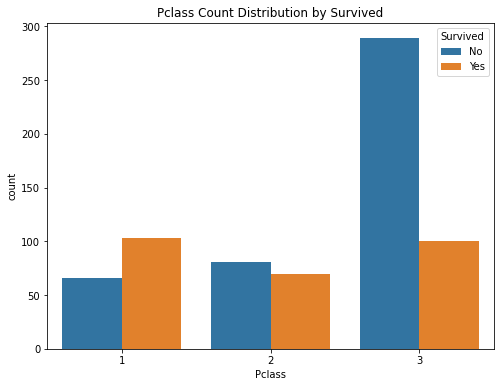

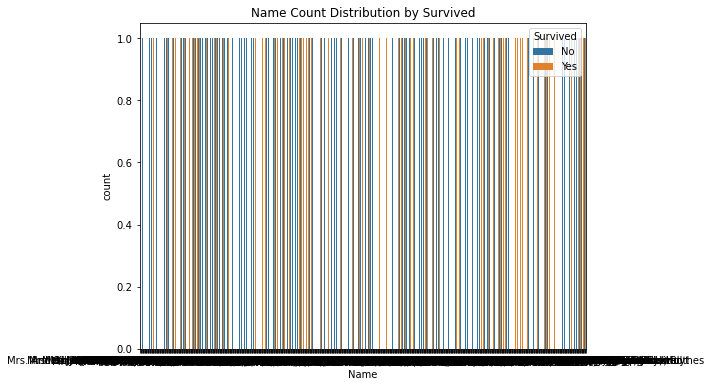

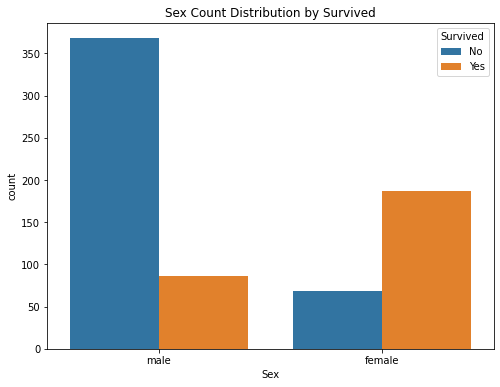

In [324]:
# Plot count distribution for each categorical variable
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Survived', data=df_train)
    plt.title(f'{feature} Count Distribution by Survived')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()

Utilizing 'Name' as a variable does not contribute substantive information. It is prudent to remove this variable from both the categorical features list and the training/testing data.

In [325]:
categorical_features.remove('Name')
categorical_features

['Pclass', 'Sex']

In [326]:
df_train.drop('Name', axis=1, inplace=True)
X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)

In [327]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 92 to 751
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   709 non-null    object 
 1   Sex                      709 non-null    object 
 2   Age                      709 non-null    float64
 3   Siblings/Spouses Aboard  709 non-null    int64  
 4   Parents/Children Aboard  709 non-null    int64  
 5   Fare                     709 non-null    float64
 6   Survived                 709 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 60.5+ KB


In [328]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 92 to 751
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   709 non-null    int64  
 1   Sex                      709 non-null    object 
 2   Age                      709 non-null    float64
 3   Siblings/Spouses Aboard  709 non-null    int64  
 4   Parents/Children Aboard  709 non-null    int64  
 5   Fare                     709 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 54.9+ KB


In [329]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 546 to 528
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   178 non-null    int64  
 1   Sex                      178 non-null    object 
 2   Age                      178 non-null    float64
 3   Siblings/Spouses Aboard  178 non-null    int64  
 4   Parents/Children Aboard  178 non-null    int64  
 5   Fare                     178 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.7+ KB


In [330]:
# Perform chi-squared test for each categorical variable
print("Chi-squared test results for categorical variables:")
for feature in categorical_features:
    contingency_table = pd.crosstab(X_train[feature], y_train)
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature}: p-value = {p_val:.5f}")

Chi-squared test results for categorical variables:
Chi-squared test for Pclass: p-value = 0.00000
Chi-squared test for Sex: p-value = 0.00000


The chi-squared test results for the 'Sex' and 'Pclass' variables indicate highly significant associations with the target variable 'Survived'. Let's interpret these results:

1. **Chi-squared test for 'Sex':**
   - **p-value = 0.00000**: The extremely low p-value (very close to zero) suggests a highly significant association between the 'Sex' of a passenger and their likelihood of survival.
   - In other words, the gender ('Sex') of a passenger is strongly related to whether they survived or not on the Titanic. Historical data supports this, showing a higher survival rate among females compared to males.

2. **Chi-squared test for 'Pclass':**
   - **p-value = 0.00000**: Again, the extremely low p-value indicates a highly significant association between the passenger class ('Pclass') and the likelihood of survival.
   - This implies that the class a passenger was in ('Pclass') significantly influenced their chances of survival. For example, passengers in higher classes (lower 'Pclass' numbers) had a better chance of survival compared to those in lower classes.

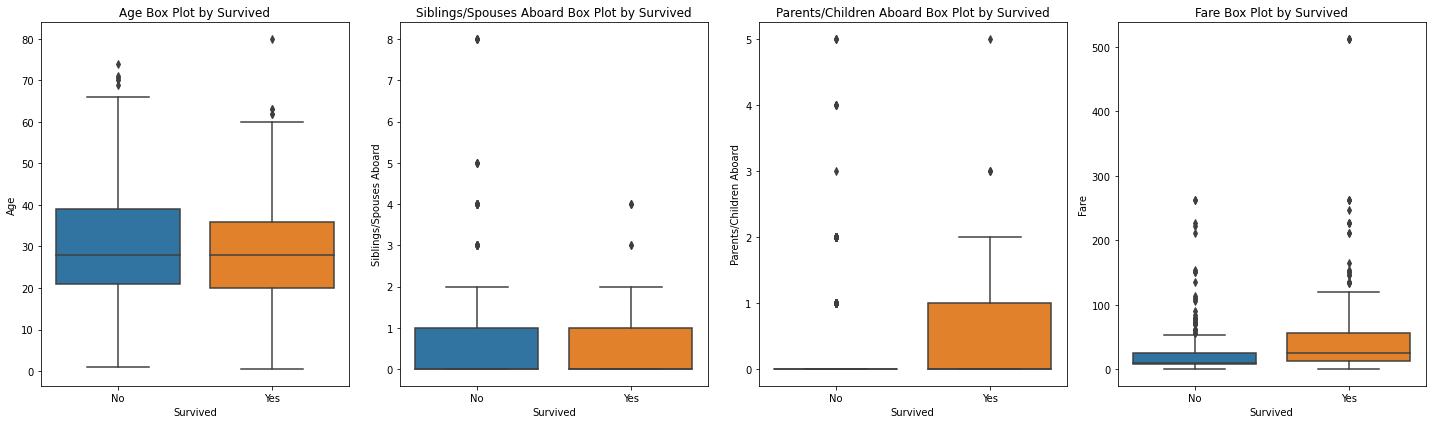

In [331]:
# Create subplots for all four box plots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Box plot for Age by Survived
sns.boxplot(x='Survived', y='Age', data=df_train, ax=axes[0])
axes[0].set_title('Age Box Plot by Survived')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Age')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# Box plot for Siblings/Spouses Aboard by Survived
sns.boxplot(x='Survived', y='Siblings/Spouses Aboard', data=df_train, ax=axes[1])
axes[1].set_title('Siblings/Spouses Aboard Box Plot by Survived')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Siblings/Spouses Aboard')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

# Box plot for Parents/Children Aboard by Survived
sns.boxplot(x='Survived', y='Parents/Children Aboard', data=df_train, ax=axes[2])
axes[2].set_title('Parents/Children Aboard Box Plot by Survived')
axes[2].set_xlabel('Survived')
axes[2].set_ylabel('Parents/Children Aboard')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No', 'Yes'])

# Box plot for Fare by Survived
sns.boxplot(x='Survived', y='Fare', data=df_train, ax=axes[3])
axes[3].set_title('Fare Box Plot by Survived')
axes[3].set_xlabel('Survived')
axes[3].set_ylabel('Fare')
axes[3].set_xticks([0, 1])
axes[3].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


# Task 3:

Create some cool features - due to the larger number of categorical variables, you can use something much sexier in addition to one-hot-encoding: http://contrib.scikit-learn.org/category_encoders/. Familiarize yourself with the methods available in this package and if you find something for yourself, use it (remember that you fit the method on the train set, and on the test set you only perform transformations on the already fitted object).

## 3.1. Sexy features

In [332]:
df_test = pd.concat([X_test, y_test], axis=1)

In [333]:
# Create a 'FamilySize' feature
df_train['FamilySize'] = df_train['Siblings/Spouses Aboard'] + df_train['Parents/Children Aboard'] + 1  # 1 for the passenger themselves
df_test['FamilySize'] = df_test['Siblings/Spouses Aboard'] + df_test['Parents/Children Aboard'] + 1  # 1 for the passenger themselves

# Check the updated training set with the new 'FamilySize' feature
print(df_train.head())


    Pclass   Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
92       3  male  26.0                        1                        2   
458      3  male  34.0                        0                        0   
465      3  male  22.0                        0                        0   
880      3  male  25.0                        0                        0   
757      3  male  41.0                        0                        0   

       Fare  Survived  FamilySize  
92   20.575         0           4  
458   8.050         0           1  
465   7.725         0           1  
880   7.050         0           1  
757   7.125         0           1  


In [334]:
# Create an 'IsAlone' feature
df_train['IsAlone'] = (df_train['Siblings/Spouses Aboard'] + df_train['Parents/Children Aboard']) == 0
df_train['IsAlone'] = df_train['IsAlone'].astype(int)

df_test['IsAlone'] = (df_test['Siblings/Spouses Aboard'] + df_test['Parents/Children Aboard']) == 0
df_test['IsAlone'] = df_test['IsAlone'].astype(int)

# Check the updated training set with the new 'IsAlone' feature
print(df_train.head())


    Pclass   Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
92       3  male  26.0                        1                        2   
458      3  male  34.0                        0                        0   
465      3  male  22.0                        0                        0   
880      3  male  25.0                        0                        0   
757      3  male  41.0                        0                        0   

       Fare  Survived  FamilySize  IsAlone  
92   20.575         0           4        0  
458   8.050         0           1        1  
465   7.725         0           1        1  
880   7.050         0           1        1  
757   7.125         0           1        1  


In [335]:
# One-hot encode 'Pclass'
df_train = pd.get_dummies(df_train, columns=['Pclass'], prefix='Pclass')
df_test = pd.get_dummies(df_test, columns=['Pclass'], prefix='Pclass')

# Binary encode 'Sex'
encoder = ce.BinaryEncoder(cols=['Sex'])
df_train = encoder.fit_transform(df_train)
df_test = encoder.fit_transform(df_test)

# Check the transformed training set with encoded variables
print(df_train.head())


     Sex_0  Sex_1   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
92       0      1  26.0                        1                        2   
458      0      1  34.0                        0                        0   
465      0      1  22.0                        0                        0   
880      0      1  25.0                        0                        0   
757      0      1  41.0                        0                        0   

       Fare  Survived  FamilySize  IsAlone  Pclass_1  Pclass_2  Pclass_3  
92   20.575         0           4        0         0         0         1  
458   8.050         0           1        1         0         0         1  
465   7.725         0           1        1         0         0         1  
880   7.050         0           1        1         0         0         1  
757   7.125         0           1        1         0         0         1  


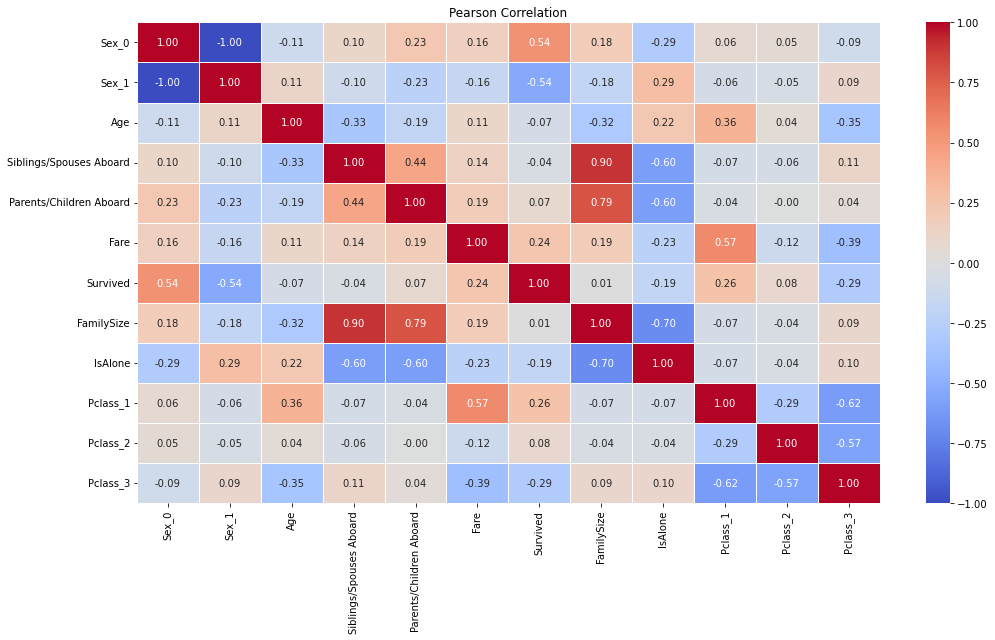

In [337]:
# Calculate the correlation matrix for numeric variables (e.g., Age, Fare)
correlation_matrix_numeric = df_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 9))

# Plot heatmap for numeric variables using Pearson correlation
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()


Since we have new features like **'Family size'** and **'IsAlone'**, we can eliminate ***'Siblings/Spouses Aboard'*** and ***'Parents/Children Aboard'***. 

Firstly, let's check the correlation. It seems Familysize and IsAlone less correlated with the target variables, however, Siblings/Spouses and Parents/Children Aboard have the correlation with each other. 
Let's drop them and continue with new variables. 

In [340]:
# Create a dataset with 'FamilySize' and 'IsAlone'
df_dataset1 = df_train.drop(['Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1)
df_test1 = df_test.drop(['Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1)

# Check the first few rows of the dataset
print("Dataset 1 (with 'FamilySize' and 'IsAlone'):")
df_dataset1.head()


Dataset 1 (with 'FamilySize' and 'IsAlone'):


Sex_0  Sex_1   Age    Fare  Survived  FamilySize  IsAlone  Pclass_1  \
92       0      1  26.0  20.575         0           4        0         0   
458      0      1  34.0   8.050         0           1        1         0   
465      0      1  22.0   7.725         0           1        1         0   
880      0      1  25.0   7.050         0           1        1         0   
757      0      1  41.0   7.125         0           1        1         0   

     Pclass_2  Pclass_3  
92          0         1  
458         0         1  
465         0         1  
880         0         1  
757         0         1

# Task 4:

Create your first logistic regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as we did with linear regression. Note that in the documentation for default logistic regression L2 regularization is turned on, turn it off first (penalty = None). In addition, in this step you must choose the evaluation functions for you (https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values). Based on the lecture and the available documentation, select the functions that will be appropriate for your problem (e.g. check if you are dealing with an unbalanced problem and decide what is more important to you, e.g. Precision or Recall optimization). Try to plot two curves that we discussed during our lecture: ROC (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) and PR (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_predictions). Remember to experiment with different logit models because of the explanatory variables used.

## 4.1. Modelling


In [341]:
# Define features (X) and target (y) for training data
X_train = df_dataset1.drop('Survived', axis=1)
y_train = df_dataset1['Survived']

# Define features (X) and target (y) for test data
X_test = df_test1.drop('Survived', axis=1)
y_test = df_test1['Survived']



In [347]:
X_train.head()

Sex_0  Sex_1   Age    Fare  FamilySize  IsAlone  Pclass_1  Pclass_2  \
92       0      1  26.0  20.575           4        0         0         0   
458      0      1  34.0   8.050           1        1         0         0   
465      0      1  22.0   7.725           1        1         0         0   
880      0      1  25.0   7.050           1        1         0         0   
757      0      1  41.0   7.125           1        1         0         0   

     Pclass_3  
92          1  
458         1  
465         1  
880         1  
757         1

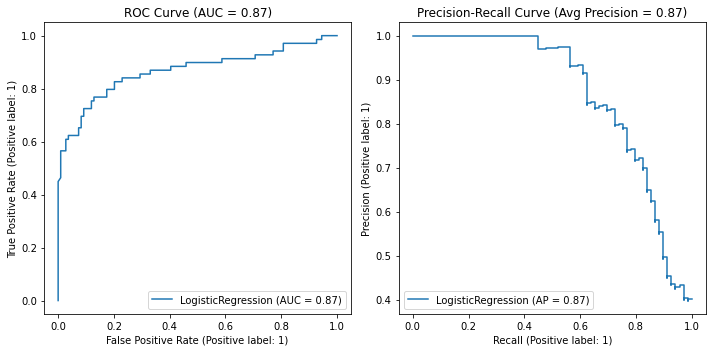

In [343]:

# Create and train the logistic regression model with L2 regularization turned off
log_reg = LogisticRegression(penalty='none', random_state=123)
log_reg.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Compute PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(1, 2, 1)
plot_roc_curve(log_reg, X_test, y_test, ax=ax1)
ax1.set_title('ROC Curve (AUC = {:.2f})'.format(roc_auc))

# Plot PR curve
ax2 = plt.subplot(1, 2, 2)
plot_precision_recall_curve(log_reg, X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve (Avg Precision = {:.2f})'.format(average_precision))

plt.tight_layout()
plt.show()


# Task 5:

Use cross-validation of your choice (if your sample is unbalanced, use cross-validation with stratified, e.g. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

In [349]:

# Define features (X) and target (y)
X = df_dataset1.drop('Survived', axis=1)
y = df_dataset1['Survived']

# Initialize StratifiedKFold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform cross-validation and obtain predicted probabilities
y_prob_cv = cross_val_predict(log_reg, X, y, cv=stratified_kfold, method='predict_proba')[:, 1]

# Compute AUC and average precision
auc_cv = roc_auc_score(y, y_prob_cv)
avg_precision_cv = average_precision_score(y, y_prob_cv)

print("Cross-validated AUC: {:.2f}".format(auc_cv))
print("Cross-validated Average Precision: {:.2f}".format(avg_precision_cv))


Cross-validated AUC: 0.85
Cross-validated Average Precision: 0.81


The cross-validated AUC (Area Under the Curve) of 0.85 and cross-validated Average Precision of 0.81 indicate that the logistic regression model is performing well in distinguishing between the positive and negative classes in your dataset. These metrics suggest a strong predictive capability of the model.

- AUC of 0.85 indicates a good ability to discriminate between positive and negative samples. The higher the AUC, the better the model is at distinguishing between survival and non-survival cases.

- Average Precision of 0.81 reflects the trade-off between precision and recall, which is important, especially in imbalanced datasets. A higher average precision indicates that the model is able to identify a substantial number of actual positive cases.

Overall, these metrics suggest a promising performance of the logistic regression model on the Titanic dataset. However, it's always a good practice to further validate the model, potentially tune hyperparameters, and evaluate its performance on an independent test set to ensure robustness. If you have any further questions or need additional assistance, feel free to ask!